# **Project: Multitask Learning for Geometric Shape Classification and Counting**

## 1. Overview

In this project, you will design, implement, and evaluate a **multitask neural network** that performs **two tasks simultaneously**:

1. **Classification** – identify which pair of geometric shape types appears in a 28×28 binary image (135 possible configurations).
2. **Regression** – predict how many shapes of each type are present (6 regression targets).

This project focuses on **multi-task learning**, i.e., using one shared model to learn several related tasks at once. You will compare how adding an auxiliary task affects performance and training dynamics.

---

## 2. Dataset

You will use the **Geometric Shape Numbers (GSN)** dataset:

```bash
!wget https://github.com/marcin119a/data/raw/refs/heads/main/data_gsn.zip
!unzip data_gsn.zip &> /dev/null
!rm data_gsn.zip
```

This will create a directory `data/` containing:

* **10,000 images** (28×28x1, grayscale)
* **labels.csv** – counts of each of six shape types per image

Each image contains exactly **two types** of geometric figures (out of six) and **10 shapes total**.

**Shape classes:**

| Index | Shape type     |
| ----: | -------------- |
|     0 | square         |
|     1 | circle         |
|     2 | triangle up    |
|     3 | triangle right |
|     4 | triangle down  |
|     5 | triangle left  |

Example row from `labels.csv`:

```
name,squares,circles,up,right,down,left
img_00000.png,0,0,0,4,0,6
```

Here, the image contains **4 right-pointing triangles** and **6 left-pointing triangles**.

**Split:**

* Training: first 9,000 samples
* Validation: last 1,000 samples

Examples:
example.png

---

## 3. Tasks and objectives

You must design a **multitask deep learning system** that:

1. **Classifies** each image into one of **135 possible configurations**, representing:

   * which **two shape classes** appear, and
   * how their counts (1–9) sum to 10.

   → Example: "3 circles + 7 squares" is one configuration class.

2. **Regresses** the number of shapes of each type (a 6-dimensional real-valued output).

3. Combines both objectives in a **joint loss** function (Hint: losses are implemented in PyTorch):


$$ Loss = \text{NLLLoss(classification)} + \lambda_{\text{cnt}} \cdot \text{SmoothL1Loss(regression)}
$$

---

## 4. Model requirements

### Architecture constraints

You must use **exactly this feature extractor (backbone)**:

```python
nn.Sequential(
    nn.Conv2d(1, 8, 3, stride=1, padding=1), nn.ReLU(),
    nn.Conv2d(8, 16, 3, stride=1, padding=1), nn.ReLU(),
    nn.Conv2d(16, 32, 3, stride=1, padding=1), nn.ReLU(),
    nn.Conv2d(32, 64, 3, stride=1, padding=1), nn.ReLU(),
    nn.Flatten(start_dim=1),
    nn.Linear(64 * 28 * 28, 256), nn.ReLU()
)
```

Then add **two separate heads**:

* `head_cls`: outputs log-probabilities for 135 classes
* `head_cnt`: outputs 6 regression values (counts)

The model must return two outputs: `(log_probs, counts)`.

You may add dropout or batch normalization inside the heads, **but you must not modify the backbone**.

---

## 5. Training setup

* Optimizer: **Adam**, learning rate = 1e-3
* Epochs: up to **100** (use **early stopping**)
* Batch sizes: **64** (train), **1000** (validation)
* Device: GPU allowed for Notebook, but your **final code must run on GPU within ~30 minutes**
* Random seed: set `torch.manual_seed(1)` for reproducibility
* Split: **exactly 9,000 train / 1,000 validation**


---

## 6. Data preprocessing and augmentation

You must implement a **PyTorch `Dataset` class** that:

* Reads `labels.csv`
* Loads the corresponding image (from `data/`)
* Returns both:
  * the image (as a tensor)
  * the labels (counts for 6 shapes)
* Optionally applies transformations

### Required augmentations

You must implement **at least three** of the following:

1. Random horizontal flip
2. Random vertical flip
3. Random 90° rotation (must correctly rotate orientation labels: up → right → down → left)
4. Random brightness/contrast (mild)
5. Gaussian noise
6. Random erasing (small areas only)


---

## 7. Evaluation metrics

Implement and report the following metrics on the validation set:

### (a) **Classification (135-way)**

* Top-1 accuracy
* Macro F1-score
* Per-pair accuracy (aggregate by unordered shape pair, e.g. {circle, up})

### (b) **Regression (6-D counts)**

* RMSE per class and overall
* MAE per class and overall

Also plot:

* Training and validation losses
* Validation accuracy and RMSE over epochs

**Important**: This task is not about finding the best architecture; we expect at least 50% accuracy, but achieving results higher than that will not affect the grade for the assignment**.


---

## 8. Experiments and analysis

You must train and compare **three model settings**:

| Setting | Description                                      |
| :------ | :----------------------------------------------- |
| 1       | **Classification-only:** λ_cnt = 0               |
| 2       | **Regression-only:** classification loss ignored |
| 3       | **Multitask:** λ_cnt = with your choose          |

For each experiment:

* Train until early stopping
* Record loss, accuracy, RMSE, and runtime
* Compare results and explain how λ influences learning
* Discuss whether multitask learning improves the main tasks


---

## 9. Final deliverables

You must submit .zip project with:

1. **Code** (`.ipynb` or `.py`) that:

   * Downloads and extracts the dataset
   * Defines dataset, dataloaders, model, loss, training loop, evaluation, and plotting
   * Can run start-to-end without interaction, and finishes within 30 minutes on Colab T4 GPUs
   * Includes three experiment configurations

2. **Report (2–4 pages, PDF)** including:
   * Section on (EDA) Exploratory Data Analysis in your report: no more than 3 graphs or tables describing the data set.
   * Model architecture
   * Description and justification of augmentations
   * Results table (loss, accuracy, RMSE for all runs)
   * Learning curves
   * Discussion on multitask effects

3. **README.md**:

   * Link to Colab version of task for fast replication.
   * Approximate runtime and resource requirements

---

## 10. Grading rubric

Component	Description	Points
1. Implementation correctness	Correct use of the fixed backbone, two-headed model, and proper training loop (classification + regression).	30%
2. Data & augmentations	Proper dataset loading, preprocessing, and at least three augmentations with brief justification.	20%
3. Evaluation & experiments	Correct computation of metrics (accuracy, F1, RMSE) and completion of all three λ configurations (λ=0, regression-only, your choice λ).	30%
4. Report & analysis
A clear separation of concerns (e.g. headers in notebooks, modules in code) and concise 2–4 page report with results tables, learning curves, confusion matrix, and short discussion on multitask effects and error examples.
20%

###### Readability and modularity will be considered within each grading component. Clear structure (headers in notebooks, docstrings, modular code) significantly improves evaluation speed. Emphasize using clear headers to help reviewers navigate efficiently.
---

In [2]:
import torch
import numpy as np
import random

SEED = 42  # You can change this seed

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

print(f"Random seed set to {SEED}")

Random seed set to 42


In [3]:
# !wget  https://github.com/marcin119a/data/raw/refs/heads/main/data_gsn.zip
# !unzip data_gsn.zip &> /dev/null
# !rm data_gsn.zip

## Calculating labels for classification problem

There are 135 combinations. This comes from:
$$\binom{6}{2}\cdot 9 = 15\cdot9 = 135$$

We propose the following labeling: <br>
For counting label $$[a_0, a_1, a_2, a_3, a_4, a_5]$$ with the only non-zero elements $a_i$ and $a_j$, where $i<j$ we will use a classification label equal to:
$$ f(i, j)\cdot9+a_i-1$$
Where for $g<h$, $f(g, h)$, is a simple indexing function: <br>
$$f(g,h) = \binom{h}{2}+g$$
where $0\leq g<h\leq5$. This provides us with unique labels from $0$ to $134$

In [4]:
import math as mth

def cnt_to_cls_idx(cnt_label: list[int]) -> int:
    """
    Converts a count label list to a class index.

    Args:
        cnt_label (list[int]): A list of 6 integers representing the counts of each shape.

    Returns:
        int: The corresponding class index (0-134).
    """
    a_1, i_1, i_2 = 0, 0, 0
    for i, cnt in enumerate(cnt_label):
        if cnt > 0:
            if not a_1:
                a_1 = cnt
                i_1 = i
            else:
                i_2 = i
                break
    cls_idx = (mth.comb(i_2, 2) + i_1) * 9 + a_1 - 1
    return cls_idx

def cls_idx_to_cnt(cls_idx: int) -> list[int]:
    """
    Converts a class index to a count label list.

    Args:
        cls_idx (int): The class index (0-134).

    Returns:
        list[int]: A list of 6 integers representing the counts of each shape.

    Raises:
        ValueError: If cls_idx is not in the range [0, 134].
    """
    if not (0 <= cls_idx <= 134):
        raise ValueError("cls_idx must be in [0, 134] for 6 labels and counts 1..9")

    a_1 = (cls_idx % 9) + 1
    pair_idx = cls_idx // 9
    i_2 = 1
    while mth.comb(i_2 + 1, 2) <= pair_idx:
        i_2 += 1
    i_1 = pair_idx - mth.comb(i_2, 2)

    cnt_label = [0] * 6
    cnt_label[i_1] = a_1
    cnt_label[i_2] = 10 - a_1
    return cnt_label

Applying and testing the labels

## Adding new labels

In [5]:
import pandas as pd
import numpy as np

CSV_PATH = "./data/labels.csv"
df = pd.read_csv(CSV_PATH)

label_cols = df.columns[1:]
n_images = len(df)

class_indices = []
for i in range(n_images):
    cnt_label = df[label_cols].iloc[i].values
    class_idx = cnt_to_cls_idx(cnt_label)
    class_indices.append(class_idx)

df["class_idx"] = class_indices


## Exploring the Data


=== DATA OVERVIEW ===
Images: 10000
Count label columns: ['squares', 'circles', 'up', 'right', 'down', 'left']
Number of classes: 135

=== COUNT LABELS SUMMARY ===
Total sum of all counts: 100000

Shape percentage of total (%):
squares    16.57
circles    17.15
up         16.53
right      16.77
down       16.86
left       16.12
dtype: float64

Presence percentage per label (%% of images with >0):
squares    32.79
circles    34.10
up         33.19
right      33.54
down       33.67
left       32.71
dtype: float64

Mean of non-zero values per label:
squares    5.055
circles    5.029
up         4.980
right      5.000
down       5.007
left       4.928
dtype: float64

=== CONSTRAINT CHECKS ===
Images with exactly 2 non-zero count labels: 100.00%
Images with sum(counts) == 10: 100.00%
Images satisfying both: 100.00%

Correlation matrix between count labels:
         squares  circles     up  right   down   left
squares    1.000   -0.202 -0.202 -0.206 -0.200 -0.192
circles   -0.202    1.000 -0.

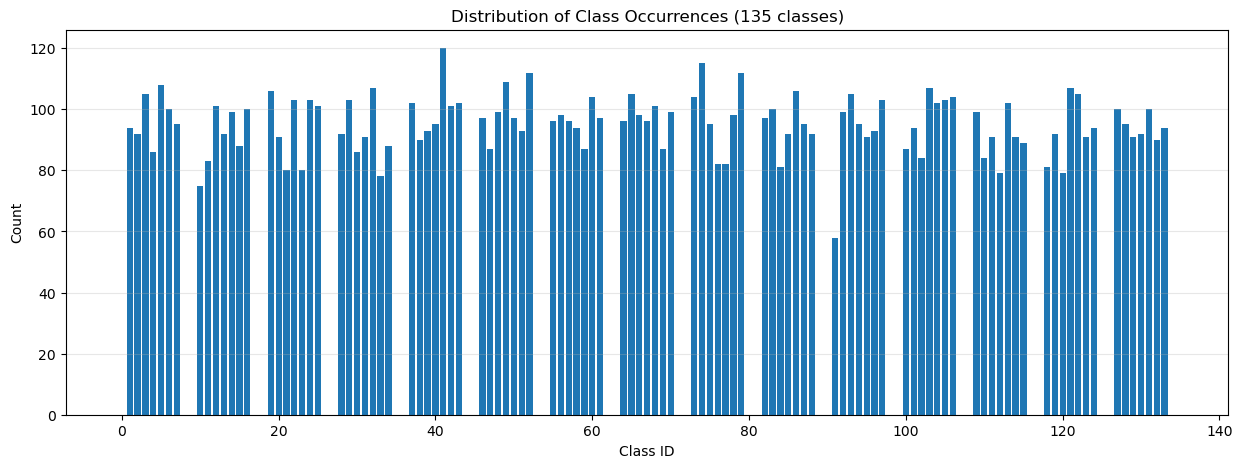

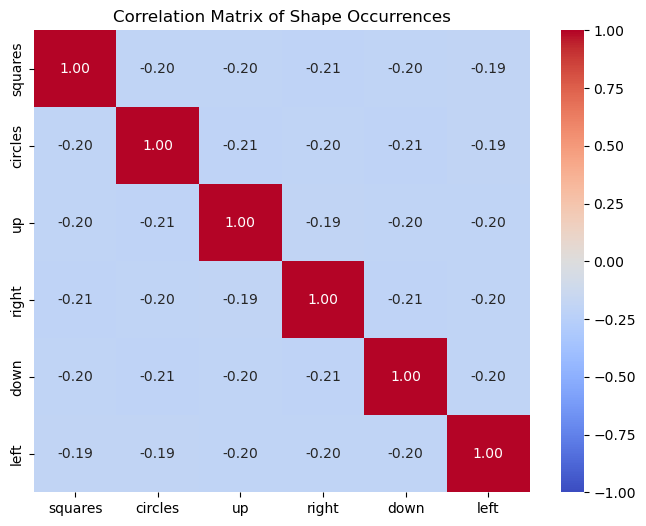

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure figures directory exists
os.makedirs("figures", exist_ok=True)

cnt_label_cols = df.columns[1:7]
n_images = len(df)


# --- COUNT LABELS ANALYSIS ---
total_shapes     = df[cnt_label_cols].sum().sum()
shape_totals     = df[cnt_label_cols].sum()
shape_percentage = 100 * shape_totals / total_shapes

corr = df[cnt_label_cols].corr(numeric_only=True)
nonzero_means = df[cnt_label_cols].replace(0, np.nan).mean()
presence_percentage = 100 * (df[cnt_label_cols] > 0).sum() / n_images

# Per-image constraints
nonzero_per_image = (df[cnt_label_cols] > 0).sum(axis=1)
sum_per_image     = df[cnt_label_cols].sum(axis=1)

prop_exact_two_nonzero = (nonzero_per_image == 2).mean() * 100
prop_sum_eq_10         = (sum_per_image == 10).mean() * 100
prop_both_constraints  = ((nonzero_per_image == 2) & (sum_per_image == 10)).mean() * 100

# --- CLASS INDEX ANALYSIS (robust) ---
n_classes = 135

# counts for all classes [0..n_classes-1], missing -> 0
class_counts_raw = df["class_idx"].value_counts()          # counts only for seen classes
class_counts_full = class_counts_raw.reindex(range(n_classes), fill_value=0)

# summary table: count + % of images containing that class
class_presence_pct = 100 * class_counts_full / n_images
class_summary = pd.DataFrame({
    "class_id": range(n_classes),
    "count": class_counts_full.values,
    "pct_of_images": class_presence_pct.values
})

# stats
num_used_classes = int((class_counts_full > 0).sum())
pct_classes_used = 100 * num_used_classes / n_classes
unused_classes = class_summary.loc[class_summary["count"] == 0, "class_id"].tolist()

# top / bottom 10 (including unseen)
top10_classes = class_summary.sort_values("count", ascending=False).head(10)
least10_present = (
    class_summary[class_summary["count"] > 0]
    .sort_values(["count", "class_id"], ascending=[True, True])
    .head(10)
    .reset_index(drop=True)
)
# --- PRINT SUMMARY ---
print("=== DATA OVERVIEW ===")
print(f"Images: {n_images}")
print(f"Count label columns: {list(label_cols)}")
print(f"Number of classes: {n_classes}")

print("\n=== COUNT LABELS SUMMARY ===")
print(f"Total sum of all counts: {int(total_shapes)}")
print("\nShape percentage of total (%):")
print(shape_percentage.round(2))
print("\nPresence percentage per label (%% of images with >0):")
print(presence_percentage.round(2))
print("\nMean of non-zero values per label:")
print(nonzero_means.round(3))

print("\n=== CONSTRAINT CHECKS ===")
print(f"Images with exactly 2 non-zero count labels: {prop_exact_two_nonzero:.2f}%")
print(f"Images with sum(counts) == 10: {prop_sum_eq_10:.2f}%")
print(f"Images satisfying both: {prop_both_constraints:.2f}%")

print("\nCorrelation matrix between count labels:")
print(corr.round(3))

print(f"Classes used: {num_used_classes}/{n_classes} ({pct_classes_used:.2f}%)")
print("Top 10 classes (id, count, % of images):")
print(top10_classes[["class_id", "count", "pct_of_images"]].to_string(index=False))

print("\nLeast 10 classes (id, count, % of images):")
print(least10_present[["class_id", "count", "pct_of_images"]].to_string(index=False))
print(f"{len(unused_classes)} unused classes:")
print(unused_classes)

# --- PLOTS ---
# 1. Bar chart for all 135 classes
plt.figure(figsize=(15, 5))
plt.bar(range(n_classes), class_counts_full.values)
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.title('Distribution of Class Occurrences (135 classes)')
plt.grid(axis='y', alpha=0.3)
plt.savefig("figures/class_distribution.png")
plt.show()

# 2. Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Shape Occurrences')
plt.savefig("figures/correlation_matrix.png")
plt.show()

## Conclusions
The dataset is well balanced: all shapes appear with similar frequency, there are no strong correlations between shape types, and whenever a shape is present its average count is close to 5 out of 10. Based on this, not much data augmentation is needed.

## Dataset Class
Each transform is applied independently with a fixed probability.

In [7]:
import pandas as pd
from pathlib import Path
from PIL import Image
from torch.utils.data import Dataset
import torchvision.transforms.functional as TF
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt
from typing import List, Tuple, Callable, Optional, Any

class MultitaskDataset(Dataset):
    """
    A custom dataset class for the multitask counting problem.

    Args:
        root (str): Path to the CSV file containing labels.
        transforms (list[Callable], optional): List of transform functions to apply. Defaults to None.
        transform_prob (float, optional): Probability of applying each transform. Defaults to 0.3.
        normalize (bool, optional): Whether to normalize the images. Defaults to True.
    """
    def __init__(self, root: str, transforms: Optional[List[Callable]] = None, transform_prob: float = 0.3, normalize: bool = True):
        self.root = Path(root)
        self.df = pd.read_csv(root)
        self.transforms = transforms or []
        self.transform_prob = transform_prob
        self.normalize = normalize

    def __len__(self) -> int:
        """
        Returns the total number of samples in the dataset.

        Returns:
            int: Length of the dataset.
        """
        return len(self.df)

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, torch.Tensor, int]:
        """
        Retrieves a sample from the dataset at the given index.

        Args:
            idx (int): Index of the sample to retrieve.

        Returns:
            Tuple[torch.Tensor, torch.Tensor, int]: A tuple containing the image tensor, 
            the count label tensor, and the class index.
        """
        num_shapes = 6
        img_path = self.root.parent / self.df.iloc[idx, 0]
        image = Image.open(img_path).convert('L')
        label_cnt = self.df.iloc[idx, 1:num_shapes+1].tolist()

        # Apply each transform independently with probability p
        for t in self.transforms:
            if torch.rand(1).item() < self.transform_prob:
                image, label_cnt = t(image, label_cnt)

        cls_idx = cnt_to_cls_idx(label_cnt)
        image = TF.to_tensor(image)
        if self.normalize:
            image = (image - 0.5) / 0.5
        return image, torch.tensor(label_cnt, dtype=torch.float32), cls_idx

def horizontal_flip(image: Image.Image, labels_cnt: List[int]) -> Tuple[Image.Image, List[int]]:
    """
    Applies horizontal flip to the image and updates labels.

    Args:
        image (PIL.Image.Image): The input image.
        labels_cnt (list[int]): The count labels.

    Returns:
        Tuple[PIL.Image.Image, list[int]]: The flipped image and updated labels.
    """
    # left/right triangle swap (indices 3 and 5)
    labels_cnt[3], labels_cnt[5] = labels_cnt[5], labels_cnt[3]
    return image.transpose(Image.FLIP_LEFT_RIGHT), labels_cnt

def vertical_flip(image: Image.Image, labels_cnt: List[int]) -> Tuple[Image.Image, List[int]]:
    """
    Applies vertical flip to the image and updates labels.

    Args:
        image (PIL.Image.Image): The input image.
        labels_cnt (list[int]): The count labels.

    Returns:
        Tuple[PIL.Image.Image, list[int]]: The flipped image and updated labels.
    """
    # up/down triangle swap (indices 2 and 4)
    labels_cnt[2], labels_cnt[4] = labels_cnt[4], labels_cnt[2]
    return image.transpose(Image.FLIP_TOP_BOTTOM), labels_cnt

def rotation(image: Image.Image, labels_cnt: List[int]) -> Tuple[Image.Image, List[int]]:
    """
    Applies 90-degree rotation (CW or CCW) to the image and updates labels.

    Args:
        image (PIL.Image.Image): The input image.
        labels_cnt (list[int]): The count labels.

    Returns:
        Tuple[PIL.Image.Image, list[int]]: The rotated image and updated labels.
    """
    # 90° CW or CCW rotation; cycle orientations
    if torch.rand(1).item() < 0.5:  # CCW (-90)
        labels_cnt[2], labels_cnt[3], labels_cnt[4], labels_cnt[5] = labels_cnt[5], labels_cnt[2], labels_cnt[3], labels_cnt[4]
        return image.rotate(-90), labels_cnt
    else:  # CW (+90)
        labels_cnt[2], labels_cnt[3], labels_cnt[4], labels_cnt[5] = labels_cnt[3], labels_cnt[4], labels_cnt[5], labels_cnt[2]
        return image.rotate(90), labels_cnt

def gaussian_noise(image: Image.Image, labels_cnt: List[int]) -> Tuple[Image.Image, List[int]]:
    """
    Adds Gaussian noise to the image.

    Args:
        image (PIL.Image.Image): The input image.
        labels_cnt (list[int]): The count labels.

    Returns:
        Tuple[PIL.Image.Image, list[int]]: The noisy image and original labels.
    """
    t = TF.to_tensor(image)
    t = t + torch.randn_like(t) * 0.05
    t = torch.clamp(t, 0.0, 1.0)
    return TF.to_pil_image(t), labels_cnt

def random_erasing(image: Image.Image, labels_cnt: List[int]) -> Tuple[Image.Image, List[int]]:
    """
    Applies random erasing to the image.

    Args:
        image (PIL.Image.Image): The input image.
        labels_cnt (list[int]): The count labels.

    Returns:
        Tuple[PIL.Image.Image, list[int]]: The image with erased patches and original labels.
    """
    # very small black patches
    n_patches = torch.randint(1, 4, (1,)).item()
    w_patch, h_patch = 2, 2
    width, height = image.size
    for _ in range(n_patches):
        i = torch.randint(0, width - w_patch, (1,)).item()
        j = torch.randint(0, height - h_patch, (1,)).item()
        image.paste(0, (i, j, i + w_patch, j + h_patch))
    return image, labels_cnt

### Test Transforms


No transform
[0, 4, 0, 6, 0, 0]


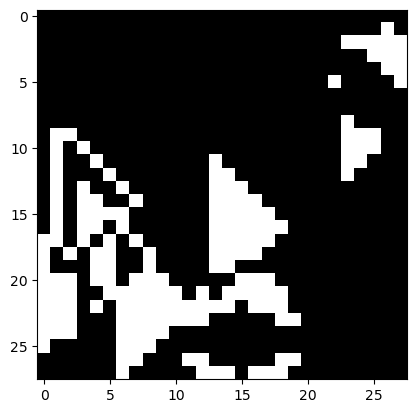

Horizontal flip
[0, 4, 0, 0, 0, 6]


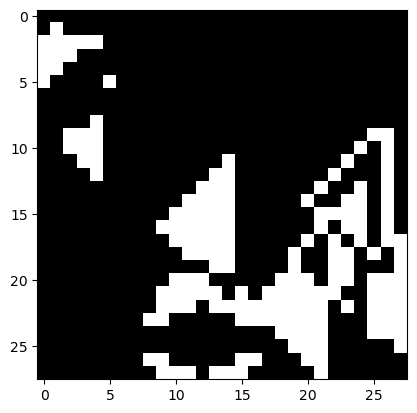

Vertical flip
[0, 4, 0, 6, 0, 0]


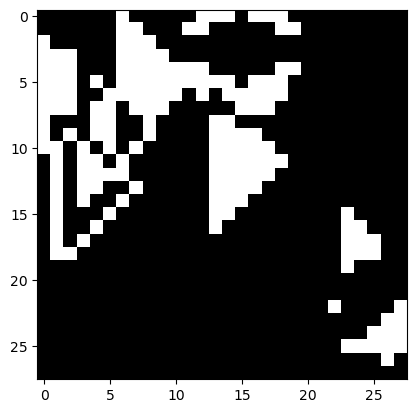

Rotation
[0, 4, 6, 0, 0, 0]


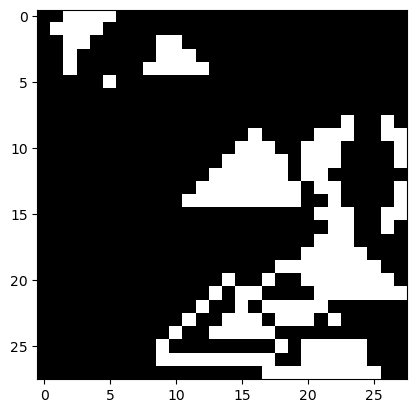

Gaussian noise
[0, 4, 0, 6, 0, 0]


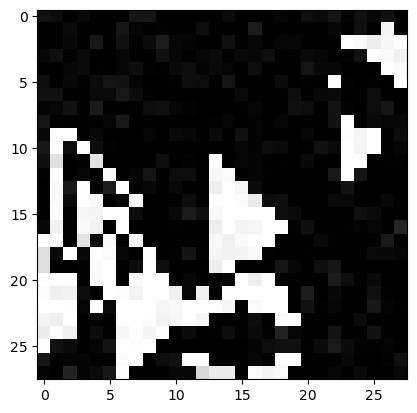

Random erasing
[0, 4, 0, 6, 0, 0]


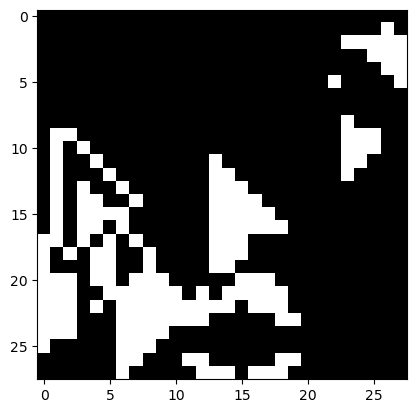

In [8]:
idx = 200
img = Image.open(Path("./data/labels.csv").parent / df.iloc[idx, 0]).convert('L')
print("No transform")
plt.imshow(img, cmap='gray')
print(df.iloc[idx, 1:-1].tolist())
plt.show()

print("Horizontal flip")
imgt, label = horizontal_flip(img, df.iloc[idx, 1:-1].tolist())
print(label)
plt.imshow(imgt, cmap='gray')
plt.show()

print("Vertical flip")
imgt, label = vertical_flip(img, df.iloc[idx, 1:-1].tolist())
print(label)
plt.imshow(imgt, cmap='gray')
plt.show()
print("Rotation")
imgt, label = rotation(img, df.iloc[idx, 1:-1].tolist())
print(label)
plt.imshow(imgt, cmap='gray')
plt.show()
print("Gaussian noise")
imgt, label = gaussian_noise(img, df.iloc[idx, 1:-1].tolist())
print(label)
plt.imshow(imgt, cmap='gray')
plt.show()
print("Random erasing")
imgt, label = random_erasing(img, df.iloc[idx, 1:-1].tolist())
print(label)
plt.imshow(imgt, cmap='gray')
plt.show()


## Splitting the data

In [9]:
import torch
from torch.utils.data import DataLoader, Subset
import os

# Reproducible generator
g = torch.Generator()
g.manual_seed(SEED)

augment_list = [horizontal_flip, vertical_flip, rotation, gaussian_noise]  # , gaussian_noise, random_erasing]

train_base = MultitaskDataset(
    root="./data/labels.csv",
    transforms=augment_list,
    transform_prob=0.6,
    normalize=True
)

test_base = MultitaskDataset(
    root="./data/labels.csv",
    transforms=[],
    transform_prob=0.0,
    normalize=True
)

n = len(train_base)
split = int(0.9 * n)  # keep last 10% as hold-out test set
train_idx = list(range(split))
test_idx  = list(range(split, n))
assert (len(train_idx), len(test_idx)) == (9000, 1000)

# ---- Create validation split from the training portion ----
val_ratio = 0.1  # use 10% of the training portion for validation
perm = torch.randperm(len(train_idx), generator=g)
val_size = int(len(train_idx) * val_ratio)
val_perm = perm[:val_size]
train_perm = perm[val_size:]

val_idx = [train_idx[i] for i in val_perm.tolist()]
new_train_idx = [train_idx[i] for i in train_perm.tolist()]

train_ds = Subset(train_base, new_train_idx)
val_ds   = Subset(train_base, val_idx)
test_ds  = Subset(test_base,  test_idx)

num_workers = min(4, os.cpu_count() // 2)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True,  num_workers=num_workers, pin_memory=True, generator=g)
val_loader   = DataLoader(val_ds,  batch_size=256, shuffle=False, num_workers=num_workers, pin_memory=True)
test_loader  = DataLoader(test_ds,  batch_size=1000, shuffle=False, num_workers=num_workers, pin_memory=True)

## Network structure


In [10]:
import torch.nn as nn
from typing import Tuple

class MultiTaskNet(nn.Module):
    """
    A multi-task neural network for simultaneous classification and counting.
    """
    def __init__(self):
        """
        Initializes the MultiTaskNet with a backbone and two heads.
        """
        super().__init__()
        self.backbone = nn.Sequential(
            nn.Conv2d(1, 8, 3, stride=1, padding=1), nn.ReLU(),
            nn.Conv2d(8, 16, 3, stride=1, padding=1), nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=1, padding=1), nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=1, padding=1), nn.ReLU(),
            nn.Flatten(start_dim=1),
            nn.Linear(64 * 28 * 28, 256), nn.ReLU()
        )
        self.head_cls = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 135)
        )
        self.head_cnt = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 6)
        )

    def forward(self, x: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        """
        Forward pass of the network.

        Args:
            x (torch.Tensor): Input tensor of shape (B, 1, H, W).

        Returns:
            Tuple[torch.Tensor, torch.Tensor]: A tuple containing log probabilities for classification
            and counts for regression.
        """
        feat = self.backbone(x)
        logits = self.head_cls(feat)
        log_probs = F.log_softmax(logits, dim=1)
        counts = self.head_cnt(feat)
        return log_probs, counts

## Training Testing an Evaluation logic


### Visualiser

In [11]:
import torch
import torch.nn as nn
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec   # <<< NEW
from typing import Dict, Any

class TrainingVisualizer:
    """
    A class for visualizing training progress in real-time.
    """
    def __init__(self, save_path: str = "figures/training_curves.png"):
        """
        Initializes the TrainingVisualizer.
        
        Args:
            save_path (str): Path to save the training curves plot.
        """
        self.epoch_indices = []
        self.save_path = save_path
        
        self.train_loss_cls = []
        self.train_loss_cnt = []
        self.train_loss_total = []
        
        self.val_loss_cls = []
        self.val_loss_cnt = []
        self.val_loss_total = []

        self.val_rmse_overall = []
        
        self.train_top1 = []
        self.val_top1 = []
        
    def update(self, epoch: int, train_metrics: Dict[str, float], val_metrics: Dict[str, Any]):
        """
        Updates the visualizer with metrics from the current epoch.

        Args:
            epoch (int): The current epoch number.
            train_metrics (dict[str, float]): Dictionary containing training metrics.
            val_metrics (dict[str, Any]): Dictionary containing validation metrics.
        """
        self.epoch_indices.append(epoch)
        
        self.train_loss_cls.append(train_metrics['loss_cls'])
        self.train_loss_cnt.append(train_metrics['loss_cnt'])
        self.train_loss_total.append(train_metrics['loss'])
        
        self.val_loss_cls.append(val_metrics['loss_cls'])
        self.val_loss_cnt.append(val_metrics['loss_cnt'])
        self.val_loss_total.append(val_metrics['loss_total'])

        self.val_rmse_overall.append(val_metrics['rmse_overall'])
        
        self.train_top1.append(train_metrics['top1'])
        self.val_top1.append(val_metrics['top1'])
        
        self.plot()
        
    def plot(self):
        """
        Plots the training and validation metrics.
        """
        clear_output(wait=True)

        # --- CHANGED LAYOUT HERE ---
        fig = plt.figure(figsize=(12, 10))
        gs = GridSpec(3, 2, figure=fig)

        ax_cls   = fig.add_subplot(gs[0, 0])   # row 1, col 1
        ax_cnt   = fig.add_subplot(gs[0, 1])   # row 1, col 2
        ax_total = fig.add_subplot(gs[1, :])   # row 2, spans both cols
        ax_top1  = fig.add_subplot(gs[2, 0])   # row 3, col 1
        ax_rmse  = fig.add_subplot(gs[2, 1])   # row 3, col 2
        
        # Plot CLS Loss
        ax_cls.plot(self.epoch_indices, self.train_loss_cls, label='Train CLS Loss')
        ax_cls.plot(self.epoch_indices, self.val_loss_cls, label='Val CLS Loss')
        ax_cls.set_title('Classification Loss')
        ax_cls.set_xlabel('Epoch')
        ax_cls.set_ylabel('Loss')
        ax_cls.legend()
        ax_cls.grid(True)
        
        # Plot CNT Loss
        ax_cnt.plot(self.epoch_indices, self.train_loss_cnt, label='Train CNT Loss')
        ax_cnt.plot(self.epoch_indices, self.val_loss_cnt, label='Val CNT Loss')
        ax_cnt.set_title('Counting Loss')
        ax_cnt.set_xlabel('Epoch')
        ax_cnt.set_ylabel('Loss')
        ax_cnt.legend()
        ax_cnt.grid(True)
        
        # Plot Total Loss (full row)
        ax_total.plot(self.epoch_indices, self.train_loss_total, label='Train Total Loss')
        ax_total.plot(self.epoch_indices, self.val_loss_total, label='Val Total Loss')
        ax_total.set_title('Total Loss')
        ax_total.set_xlabel('Epoch')
        ax_total.set_ylabel('Loss')
        ax_total.legend()
        ax_total.grid(True)
        
        # Plot Top1 Accuracy (third row, left)
        ax_top1.plot(self.epoch_indices, [x * 100 for x in self.train_top1], label='Train Top1 Acc')
        ax_top1.plot(self.epoch_indices, [x * 100 for x in self.val_top1], label='Val Top1 Acc')
        ax_top1.set_title('Top1 Accuracy')
        ax_top1.set_xlabel('Epoch')
        ax_top1.set_ylabel('Accuracy (%)')
        ax_top1.legend()
        ax_top1.grid(True)

        # Plot RMSE for Counting (third row, right)
        ax_rmse.plot(self.epoch_indices, self.val_rmse_overall, label='Val RMSE Overall [cnt]')
        ax_rmse.set_title('Counting RMSE Overall [cnt]')
        ax_rmse.set_xlabel('Epoch')
        ax_rmse.set_ylabel('RMSE')
        ax_rmse.legend()
        ax_rmse.grid(True)
        
        plt.tight_layout()
        plt.savefig(self.save_path)
        plt.show()

### Training

In [21]:
def train_epoch(
    model: torch.nn.Module,
    device: torch.device,
    train_loader: torch.utils.data.DataLoader,
    optimizer: torch.optim.Optimizer,
    epoch: int,
    log_interval: int,
    verbose: bool = False,
    lambda_cnt: float = 0.1,
    ignore_cls: bool = False
) -> Dict[str, float]:
    """
    Trains the model for one epoch.

    Args:
        model (torch.nn.Module): The neural network model.
        device (torch.device): The device to train on (CPU or GPU).
        train_loader (torch.utils.data.DataLoader): The training data loader.
        optimizer (torch.optim.Optimizer): The optimizer.
        epoch (int): The current epoch number.
        log_interval (int): Interval for logging training status.
        verbose (bool, optional): Whether to print training status. Defaults to False.
        lambda_cnt (float, optional): Weight for the counting loss. Defaults to 0.1.
        ignore_cls (bool, optional): Whether to ignore classification loss. Defaults to False.

    Returns:
        dict[str, float]: A dictionary containing training metrics (loss, loss_cls, loss_cnt, top1, pair_acc).
    """
    model.train()
    total_loss = 0.0
    total_loss_cls = 0.0
    total_loss_cnt = 0.0
    n_total = 0
    correct_cls = 0
    correct_pair = 0

    for batch_idx, (data, target_cnt, target_cls) in enumerate(train_loader):
        data = data.to(device)
        target_cls = target_cls.to(device).long()
        target_cnt = target_cnt.to(device).float()

        optimizer.zero_grad()
        log_probs, counts = model(data)


        loss_cls = F.nll_loss(log_probs, target_cls)
        loss_cnt = F.smooth_l1_loss(counts, target_cnt)
        if ignore_cls:
            loss = loss_cnt
        else:
            loss = loss_cls + lambda_cnt * loss_cnt
        print(loss.shape)
        print(loss)
        print(type(loss))
        continue_training = input("Continue? (y/n): ")
        loss.backward()
        optimizer.step()

        batch_size = data.size(0)
        total_loss += loss.item() * batch_size
        total_loss_cls += loss_cls.item() * batch_size
        total_loss_cnt += loss_cnt.item() * batch_size
        n_total += batch_size

        preds = log_probs.argmax(dim=1)
        correct_cls += (preds == target_cls).sum().item()
        correct_pair += ((preds // 9) == (target_cls // 9)).sum().item()

        if verbose and batch_idx % log_interval == 0:
            done = batch_idx * batch_size
            print(f"Train Epoch: {epoch} [{done}/{len(train_loader.dataset)}] Loss={loss.item():.4f}")

    avg_loss = total_loss / n_total
    avg_loss_cls = total_loss_cls / n_total
    avg_loss_cnt = total_loss_cnt / n_total
    top1 = correct_cls / n_total
    pair_acc = correct_pair / n_total
    return {
        "loss": avg_loss, 
        "loss_cls": avg_loss_cls, 
        "loss_cnt": avg_loss_cnt, 
        "top1": top1, 
        "pair_acc": pair_acc
    }

### Testing

In [13]:
def test(
    model: torch.nn.Module,
    device: torch.device,
    test_loader: torch.utils.data.DataLoader,
    epoch: int,
    lambda_cnt: float = 0.5,
    verbose: bool = False,
    data_for_plotting: bool = False
) -> Dict[str, Any]:
    """
    Evaluates the model on the test set.

    Args:
        model (torch.nn.Module): The neural network model.
        device (torch.device): The device to evaluate on (CPU or GPU).
        test_loader (torch.utils.data.DataLoader): The test data loader.
        epoch (int): The current epoch number (for logging).
        lambda_cnt (float, optional): Weight for the counting loss. Defaults to 0.5.
        verbose (bool, optional): Whether to print evaluation results. Defaults to False.
        data_for_plotting (bool, optional): Whether to collect data for plotting. Defaults to False.

    Returns:
        dict[str, Any]: A dictionary containing evaluation metrics (losses, accuracies, RMSE, MAE, confusion matrix, pair accuracy matrix).
    """
    model.eval()

    n_classes = 135
    n_reg_targets = 6
    n_shapes = 6

    total_loss_cls = 0.0
    total_loss_cnt = 0.0
    n_total = 0

    # classification metrics
    n_correct_cls = 0
    n_correct_pair = 0 
    conf_mat = torch.zeros(n_classes, n_classes, dtype=torch.long)
    
    # For 6x6 pair matrix
    # We need to track correct pair predictions per pair type
    # pair_idx goes from 0 to 14
    pair_correct_counts = torch.zeros(15, dtype=torch.long)
    pair_total_counts = torch.zeros(15, dtype=torch.long)

    # regression metrics
    sum_sq_err_per_class = torch.zeros(n_reg_targets)
    sum_abs_err_per_class = torch.zeros(n_reg_targets)

    pred_labels_all = []
    true_labels_all = []
    pred_counts_all = []
    true_counts_all = []

    with torch.no_grad():
        for data, target_cnt, target_cls in test_loader:
            data = data.to(device)
            target_cls = target_cls.to(device).long()
            target_cnt = target_cnt.to(device).float()

            log_probs, counts = model(data)

            pred_labels_all.append(log_probs.argmax(dim=1).cpu())
            true_labels_all.append(target_cls.cpu())
            pred_counts_all.append(counts.cpu())
            true_counts_all.append(target_cnt.cpu())

            loss_cls = F.nll_loss(log_probs, target_cls, reduction="sum")
            loss_cnt = F.smooth_l1_loss(counts, target_cnt, reduction="sum")

            batch_size = data.size(0)
            total_loss_cls += loss_cls.item()
            total_loss_cnt += loss_cnt.item()
            n_total += batch_size

            pred_cls = log_probs.argmax(dim=1)

            n_correct_cls += (pred_cls == target_cls).sum().item()

            true_pair_idx = target_cls // 9
            pred_pair_idx = pred_cls // 9
            
            # Overall pair accuracy
            n_correct_pair += (true_pair_idx == pred_pair_idx).sum().item()
            
            # Per-pair accuracy accumulation
            for t_p, p_p in zip(true_pair_idx.view(-1), pred_pair_idx.view(-1)):
                pair_total_counts[t_p] += 1
                if t_p == p_p:
                    pair_correct_counts[t_p] += 1

            for t, p in zip(target_cls.view(-1), pred_cls.view(-1)):
                conf_mat[t.item(), p.item()] += 1

            diff = counts - target_cnt          # (B, 6)
            sq_err = diff ** 2
            abs_err = diff.abs()

            sum_sq_err_per_class += sq_err.sum(dim=0).cpu()
            sum_abs_err_per_class += abs_err.sum(dim=0).cpu()

    # average losses
    avg_loss_cls = total_loss_cls / n_total
    avg_loss_cnt = total_loss_cnt / n_total
    avg_loss_total = avg_loss_cls + lambda_cnt * avg_loss_cnt

    # --- classification: top-1 & per-pair ---
    top1_acc = n_correct_cls / n_total
    pair_acc = n_correct_pair / n_total

    # --- macro F1 over 135 classes ---
    f1_per_class = []
    for c in range(n_classes):
        tp = conf_mat[c, c].item()
        fp = conf_mat[:, c].sum().item() - tp
        fn = conf_mat[c, :].sum().item() - tp

        if tp == 0 and fp == 0 and fn == 0:
            f1 = 0.0  # class never appears
        else:
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
            if precision + recall == 0:
                f1 = 0.0
            else:
                f1 = 2 * precision * recall / (precision + recall)
        f1_per_class.append(f1)

    macro_f1 = sum(f1_per_class) / n_classes
    
    # --- 6x6 Pair Accuracy Matrix ---
    # Map pair_idx 0..14 back to (i1, i2)
    # pair_idx = comb(i2, 2) + i1
    pair_acc_mat = torch.zeros(n_shapes, n_shapes)
    pair_acc_mat[:] = float('nan') # Initialize with NaN
    
    import math
    idx = 0
    for i2 in range(1, n_shapes):
        for i1 in range(i2):
            # This corresponds to pair_idx = idx
            if pair_total_counts[idx] > 0:
                acc_p = pair_correct_counts[idx].item() / pair_total_counts[idx].item()
                pair_acc_mat[i1, i2] = acc_p
                pair_acc_mat[i2, i1] = acc_p
            idx += 1

    # --- regression: RMSE / MAE per class + overall ---
    num_samples = n_total
    rmse_per_class = (sum_sq_err_per_class / num_samples).sqrt()
    mae_per_class = sum_abs_err_per_class / num_samples

    num_elements = n_total * n_reg_targets
    rmse_overall = (sum_sq_err_per_class.sum() / num_elements) ** 0.5
    mae_overall = sum_abs_err_per_class.sum() / num_elements

    if verbose:
        print(f"\nTest set (epoch {epoch}):")
        print(f"  Classification (135-way):")
        print(f"    Top-1 accuracy: {100.0 * top1_acc:.2f}%")
        print(f"    Macro F1-score: {macro_f1:.4f}")
        print(f"    Per-pair accuracy (unordered pair): {100.0 * pair_acc:.2f}%")

        print(f"\n  Regression (6-D counts):")
        class_names = ["squares", "circles", "up", "right", "down", "left"]
        print("    RMSE per class:")
        for name, v in zip(class_names, rmse_per_class):
            print(f"      {name:7s}: {v:.4f}")
        print("    MAE per class:")
        for name, v in zip(class_names, mae_per_class):
            print(f"      {name:7s}: {v:.4f}")
        print(f"    RMSE overall: {rmse_overall:.4f}")
        print(f"    MAE overall: {mae_overall:.4f}")

        print(f"\n  Losses:")
        print(f"    cls={avg_loss_cls:.4f}, cnt={avg_loss_cnt:.4f}, total={avg_loss_total:.4f}\n")

    if data_for_plotting:
        return {
            "loss_cls": avg_loss_cls,
            "loss_cnt": avg_loss_cnt,
            "loss_total": avg_loss_total,
            "top1": top1_acc,
            "macro_f1": macro_f1,
            "pair_acc": pair_acc,
            "rmse_per_class": rmse_per_class,
            "mae_per_class": mae_per_class,
            "rmse_overall": rmse_overall.item(),
            "mae_overall": mae_overall.item(),
            "conf_mat": conf_mat,
            "pair_acc_mat": pair_acc_mat,
            "pred_labels_all": pred_labels_all,
            "true_labels_all": true_labels_all,
            "pred_counts_all": pred_counts_all,
            "true_counts_all": true_counts_all
        }
    else:
        return {
            "loss_cls": avg_loss_cls,
            "loss_cnt": avg_loss_cnt,
            "loss_total": avg_loss_total,
            "top1": top1_acc,
            "macro_f1": macro_f1,
            "pair_acc": pair_acc,
            "rmse_per_class": rmse_per_class,
            "mae_per_class": mae_per_class,
            "rmse_overall": rmse_overall.item(),
            "mae_overall": mae_overall.item(),
        }

### Plotting

In [14]:
def plot_results(
    conf_mat: torch.Tensor,
    pair_acc_mat: torch.Tensor,
    pred_labels_all: list,
    true_labels_all: list,
    pred_counts_all: list,
    true_counts_all: list,
    exp_num : int = 1,
    save_dir: str = "figures"
):
    """
    Plots the confusion matrix, pair accuracy matrix and accuracy per class.

    Args:
        conf_mat (torch.Tensor): Confusion matrix of shape (n_classes, n_classes).
        pair_acc_mat (torch.Tensor): Pair accuracy matrix of shape (6, 6).
        save_dir (str, optional): Directory to save the plots. Defaults to "figures".
    """
    import os
    import matplotlib.pyplot as plt
    import seaborn as sns

    os.makedirs(save_dir, exist_ok=True)
    class_accs = []
    for c in range(135):
        total = conf_mat[c, :].sum()
        if total > 0:
            acc_c = conf_mat[c, c] / total
            class_accs.append(acc_c)
        else:
            class_accs.append(0.0)

    plt.figure(figsize=(15, 5))
    plt.bar(range(135), class_accs)
    plt.xlabel('Class ID')
    plt.ylabel('Accuracy')
    plt.title('Accuracy per Class (135 classes) [cls]')
    plt.grid(axis='y', alpha=0.3)
    plt.savefig(f"figures/exp{exp_num}_accuracy_per_class.png")
    plt.show()

    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # Confusion matrix (large) - do not annotate to keep the figure readable
    sns.heatmap(conf_mat.cpu().numpy(), ax=axes[0], cmap='Blues', cbar=True)
    axes[0].set_title('Confusion Matrix (135 classes) [cls]')
    axes[0].set_xlabel('Predicted Class')
    axes[0].set_ylabel('True Class')

    # Pair accuracy matrix (6x6) - annotated
    sns.heatmap(pair_acc_mat.cpu().numpy(), ax=axes[1], annot=True, fmt='.2f', cmap='Greens', vmin=0.0, vmax=1.0)
    axes[1].set_title('Pair Accuracy Matrix (6 shapes) [cls]')
    axes[1].set_xlabel('Shape Index')
    axes[1].set_ylabel('Shape Index')

    plt.tight_layout()

    out_path = os.path.join(save_dir, f"exp{exp_num}_confusion_and_pair_accuracy.png")
    fig.savefig(out_path, dpi=200, bbox_inches='tight')
    plt.show()
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # True vs Predicted labels [cls]
    pred_labels = torch.cat(pred_labels_all).numpy()
    true_labels = torch.cat(true_labels_all).numpy()
    
    axes[0].scatter(true_labels, pred_labels, alpha=1, s=5)
    axes[0].plot([0, 134], [0, 134], 'r--')
    axes[0].set_xlabel('True Class')
    axes[0].set_ylabel('Predicted Class')
    axes[0].set_title('True vs Predicted Class [cls]')

    # True vs Predicted counts [cnt]
    pred_counts = torch.cat(pred_counts_all).cpu().numpy()
    true_counts = torch.cat(true_counts_all).cpu().numpy()
    
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']
    shapes = ["squares", "circles", "up", "right", "down", "left"]
    
    for i in range(6):
        axes[1].scatter(true_counts[:, i], pred_counts[:, i], label=shapes[i], alpha=0.3, c=colors[i], s=10)
    
    # Determine max value for plotting line
    max_val = max(true_counts.max(), pred_counts.max())
    axes[1].plot([0, max_val], [0, max_val], 'k--')
    
    axes[1].set_xlabel('True Count')
    axes[1].set_ylabel('Predicted Count (not rounded to show actual output)')
    axes[1].set_title('True vs Predicted Count (all shapes) [cnt]')
    axes[1].legend()

    plt.tight_layout()
    out_path = os.path.join(save_dir, f"exp{exp_num}_scatter_plots.png")
    fig.savefig(out_path, dpi=200, bbox_inches='tight')
    plt.show()
    


# Experiment 1
$\lambda_{cnt} = 0$

### Hyperparameters

In [15]:
epochs = 100
lambda_cnt = 0      
lr = 1e-3             
log_interval = 20

# Early stopping hyperparameters (added)
early_stopping_patience = 15
early_stopping_min_delta = 0.0  # minimum improvement to reset patience

train_losses = []
train_top1 = []
train_pair_acc = []
val_losses = []
val_top1 = []
val_pair_acc = []
val_rmse_overall = []

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
visualizer = TrainingVisualizer(save_path="figures/exp1_training_curves.png")

best_val_loss = float('inf')
epochs_no_improve = 0


for epoch in range(1, epochs + 1):
    tr_metrics = train_epoch(
        model, device, train_loader, optimizer, epoch, log_interval,
        verbose=False, lambda_cnt=lambda_cnt
    )
    # use validation loader (subset of training data) instead of test set
    val_metrics = test(
        model, device, val_loader, epoch, lambda_cnt=lambda_cnt, verbose=False
    )

    train_losses.append(tr_metrics["loss"])
    train_top1.append(tr_metrics["top1"])
    train_pair_acc.append(tr_metrics["pair_acc"])
    val_losses.append(val_metrics["loss_total"])
    val_top1.append(val_metrics["top1"])
    val_pair_acc.append(val_metrics["pair_acc"])
    val_rmse_overall.append(val_metrics["rmse_overall"])  # overall RMSE of counts
    
    visualizer.update(epoch, tr_metrics, val_metrics)

    current_val_loss = val_metrics["loss_total"]
    
    # Early stopping check
    if epoch == 1:
        best_val_loss = current_val_loss
        epochs_no_improve = 0
    else:
        if best_val_loss - current_val_loss > early_stopping_min_delta:
            best_val_loss = current_val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

    if epochs_no_improve >= early_stopping_patience:
        print(f"Early stopping triggered after epoch {epoch}. No improvement in validation loss for {early_stopping_patience} consecutive epochs.")
        break

torch.Size([])
tensor(4.9038, device='cuda:0', grad_fn=<AddBackward0>)
<class 'torch.Tensor'>


KeyboardInterrupt: Interrupted by user


Test set (epoch 100):
  Classification (135-way):
    Top-1 accuracy: 48.10%
    Macro F1-score: 0.3507
    Per-pair accuracy (unordered pair): 94.40%

  Regression (6-D counts):
    RMSE per class:
      squares: 3.2210
      circles: 3.5655
      up     : 3.8386
      right  : 3.6806
      down   : 3.4350
      left   : 3.0722
    MAE per class:
      squares: 1.8476
      circles: 2.4965
      up     : 2.7638
      right  : 2.3880
      down   : 2.1683
      left   : 1.9072
    RMSE overall: 3.4787
    MAE overall: 2.2619

  Losses:
    cls=1.3942, cnt=11.1979, total=1.3942



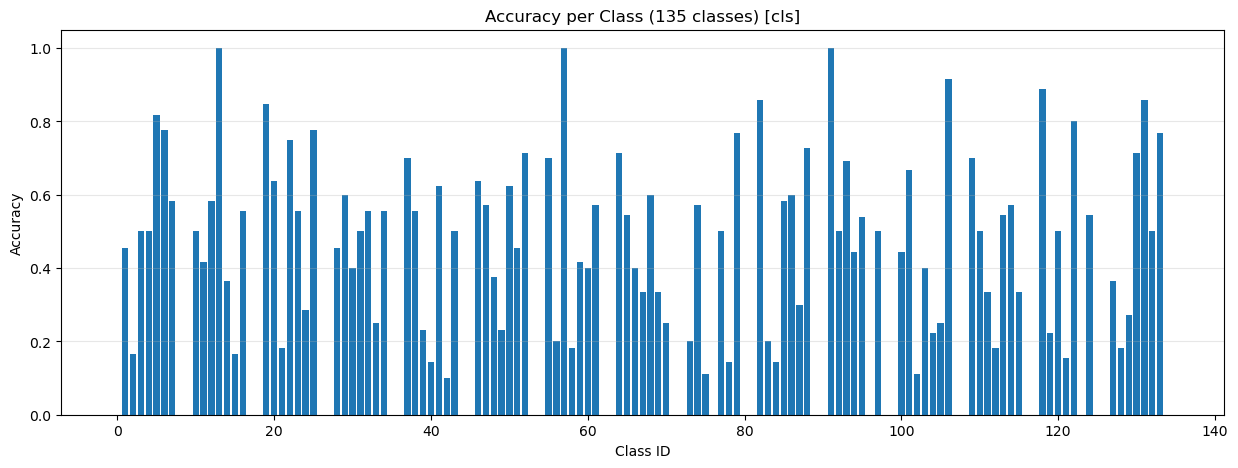

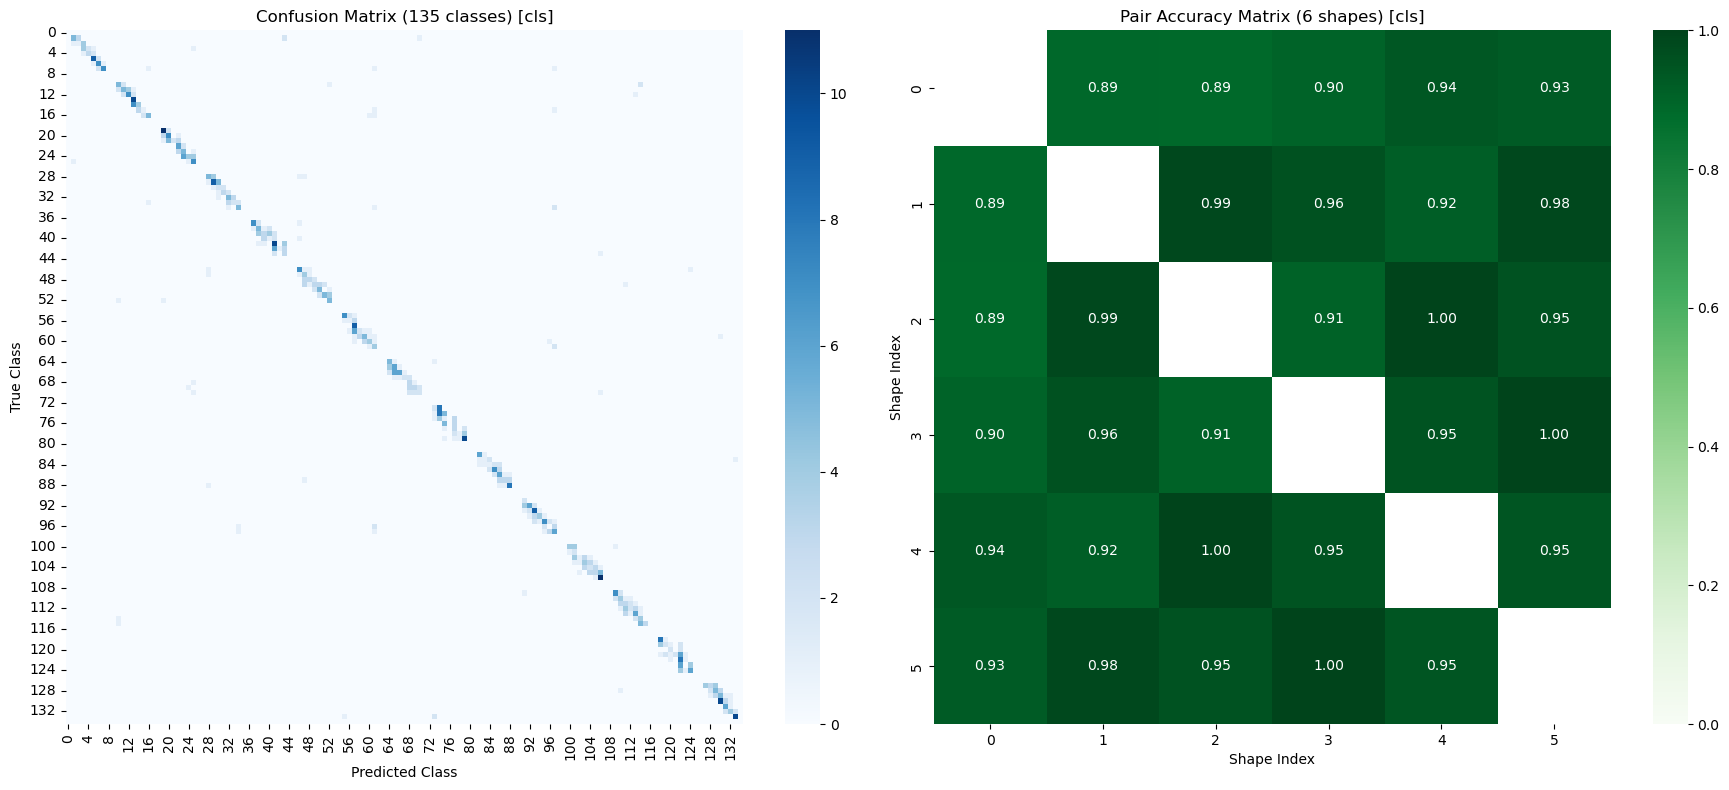

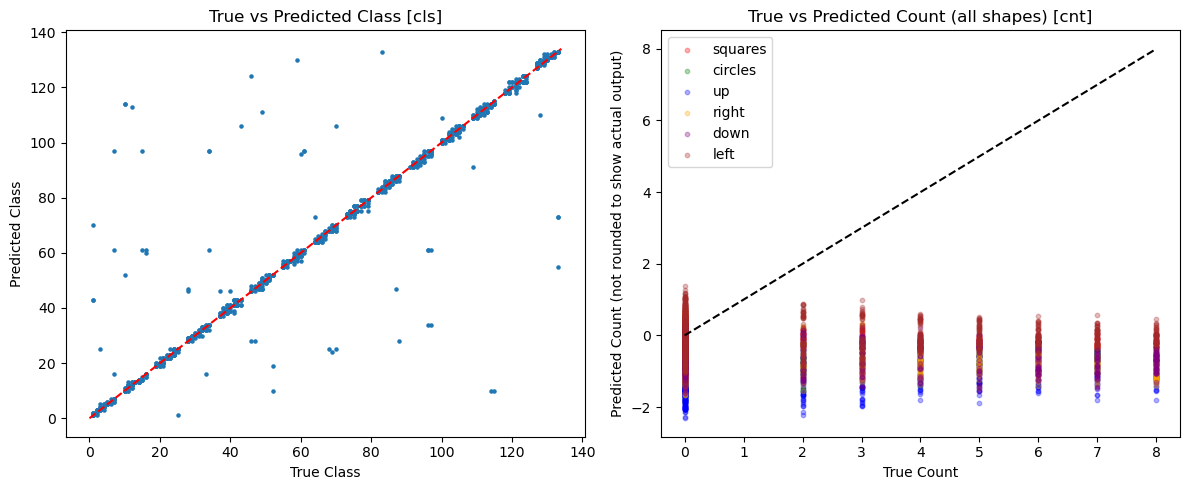

In [ ]:
test_metrics = test(
    model, device, test_loader, epoch=epochs, 
    lambda_cnt=lambda_cnt, verbose=True, data_for_plotting=True
)

plot_results(
    conf_mat=test_metrics["conf_mat"],
    pair_acc_mat=test_metrics["pair_acc_mat"],
    pred_labels_all=test_metrics["pred_labels_all"],
    true_labels_all=test_metrics["true_labels_all"],
    pred_counts_all=test_metrics["pred_counts_all"],
    true_counts_all=test_metrics["true_counts_all"],
    exp_num=1,
    save_dir="figures"
)

# Experiment 2
Ignore classification loss

### Hyperparameters

In [ ]:
epochs = 100
lambda_cnt = 1      
ignore_cls = True
lr = 1e-3
log_interval = 20

# Early stopping hyperparameters (added)
early_stopping_patience = 15
early_stopping_min_delta = 0.0  # minimum improvement to reset patience

train_losses = []
train_top1 = []
train_pair_acc = []
val_losses = []
val_top1 = []
val_pair_acc = []
val_rmse_overall = []

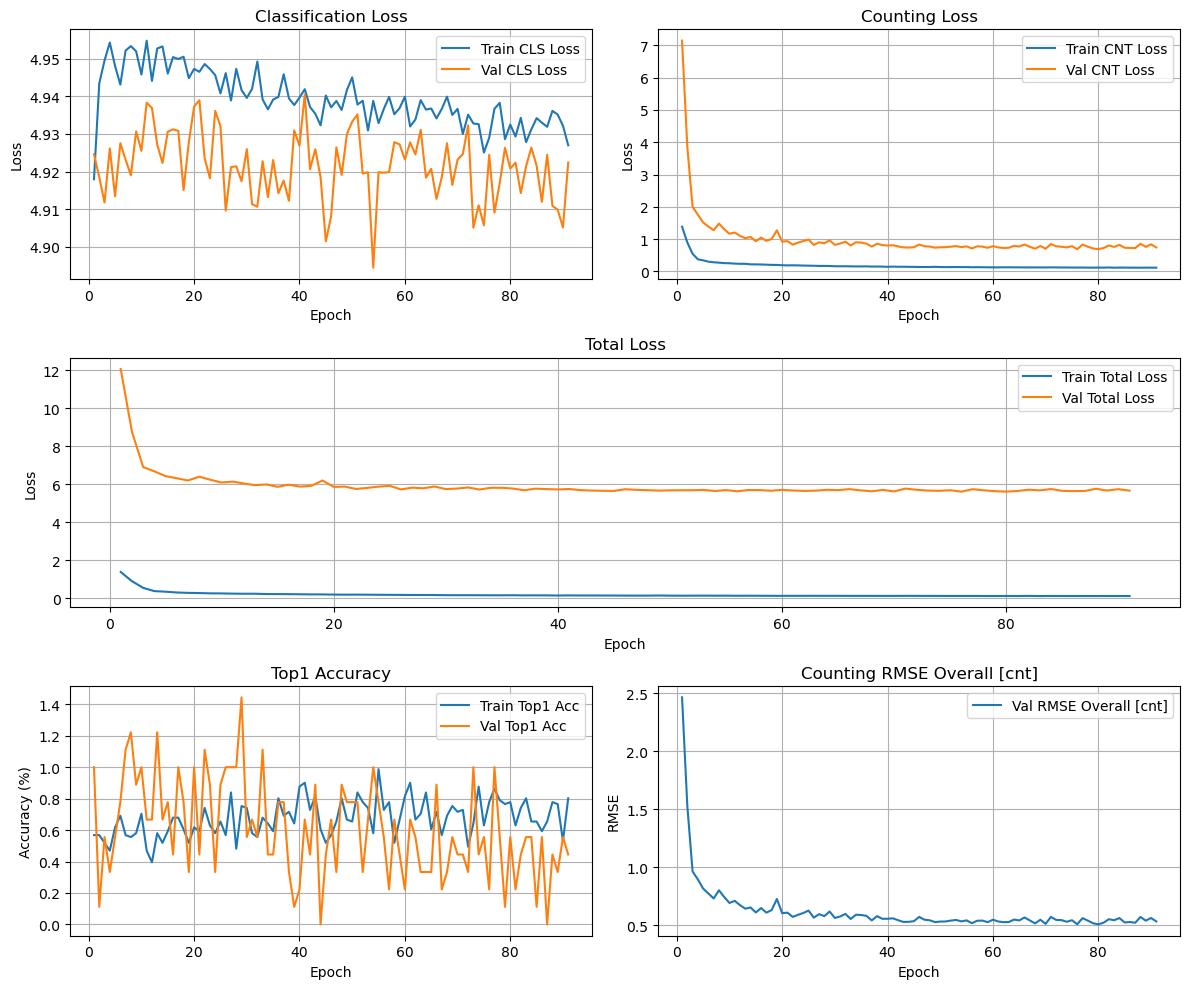

Early stopping triggered after epoch 91. No improvement in validation loss for 15 consecutive epochs.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
visualizer = TrainingVisualizer(save_path="figures/exp2_training_curves.png")

best_val_loss = float('inf')
epochs_no_improve = 0


for epoch in range(1, epochs + 1):
    tr_metrics = train_epoch(
        model, device, train_loader, optimizer, epoch, log_interval,
        verbose=False, lambda_cnt=lambda_cnt, ignore_cls=ignore_cls
    )
    # use validation loader (subset of training data) instead of test set
    val_metrics = test(
        model, device, val_loader, epoch, lambda_cnt=lambda_cnt, verbose=False
    )

    train_losses.append(tr_metrics["loss"])
    train_top1.append(tr_metrics["top1"])
    train_pair_acc.append(tr_metrics["pair_acc"])
    val_losses.append(val_metrics["loss_total"])
    val_top1.append(val_metrics["top1"])
    val_pair_acc.append(val_metrics["pair_acc"])
    val_rmse_overall.append(val_metrics["rmse_overall"])  # overall RMSE of counts
    
    visualizer.update(epoch, tr_metrics, val_metrics)

    current_val_loss = val_metrics["loss_total"]
    
    # Early stopping check
    if epoch == 1:
        best_val_loss = current_val_loss
        epochs_no_improve = 0
    else:
        if best_val_loss - current_val_loss > early_stopping_min_delta:
            best_val_loss = current_val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

    if epochs_no_improve >= early_stopping_patience:
        print(f"Early stopping triggered after epoch {epoch}. No improvement in validation loss for {early_stopping_patience} consecutive epochs.")
        break


Test set (epoch 100):
  Classification (135-way):
    Top-1 accuracy: 0.60%
    Macro F1-score: 0.0010
    Per-pair accuracy (unordered pair): 6.00%

  Regression (6-D counts):
    RMSE per class:
      squares: 0.5035
      circles: 0.4870
      up     : 0.5575
      right  : 0.6178
      down   : 0.5468
      left   : 0.6751
    MAE per class:
      squares: 0.2963
      circles: 0.2780
      up     : 0.3073
      right  : 0.3234
      down   : 0.2928
      left   : 0.3588
    RMSE overall: 0.5683
    MAE overall: 0.3094

  Losses:
    cls=4.9286, cnt=0.8138, total=5.7425



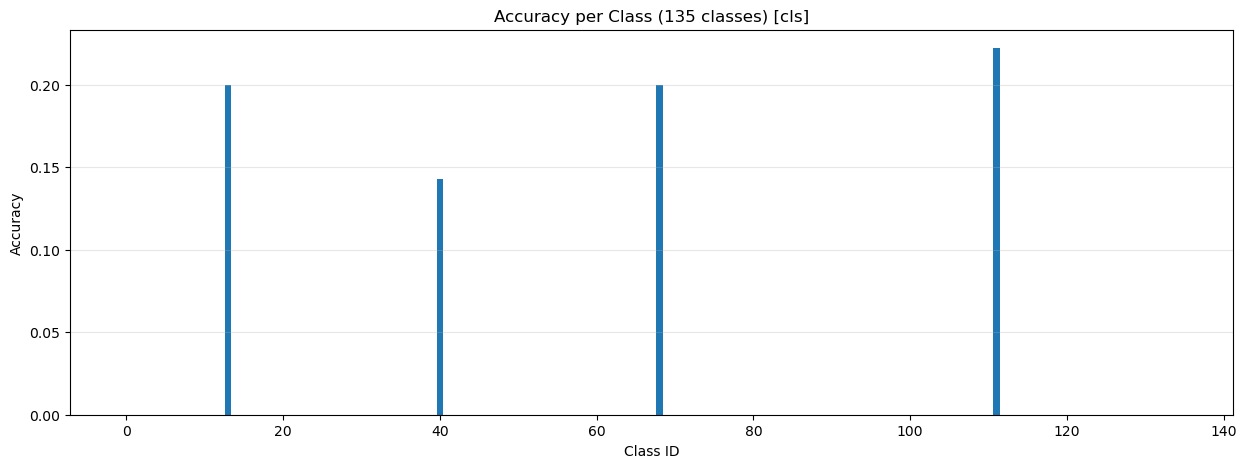

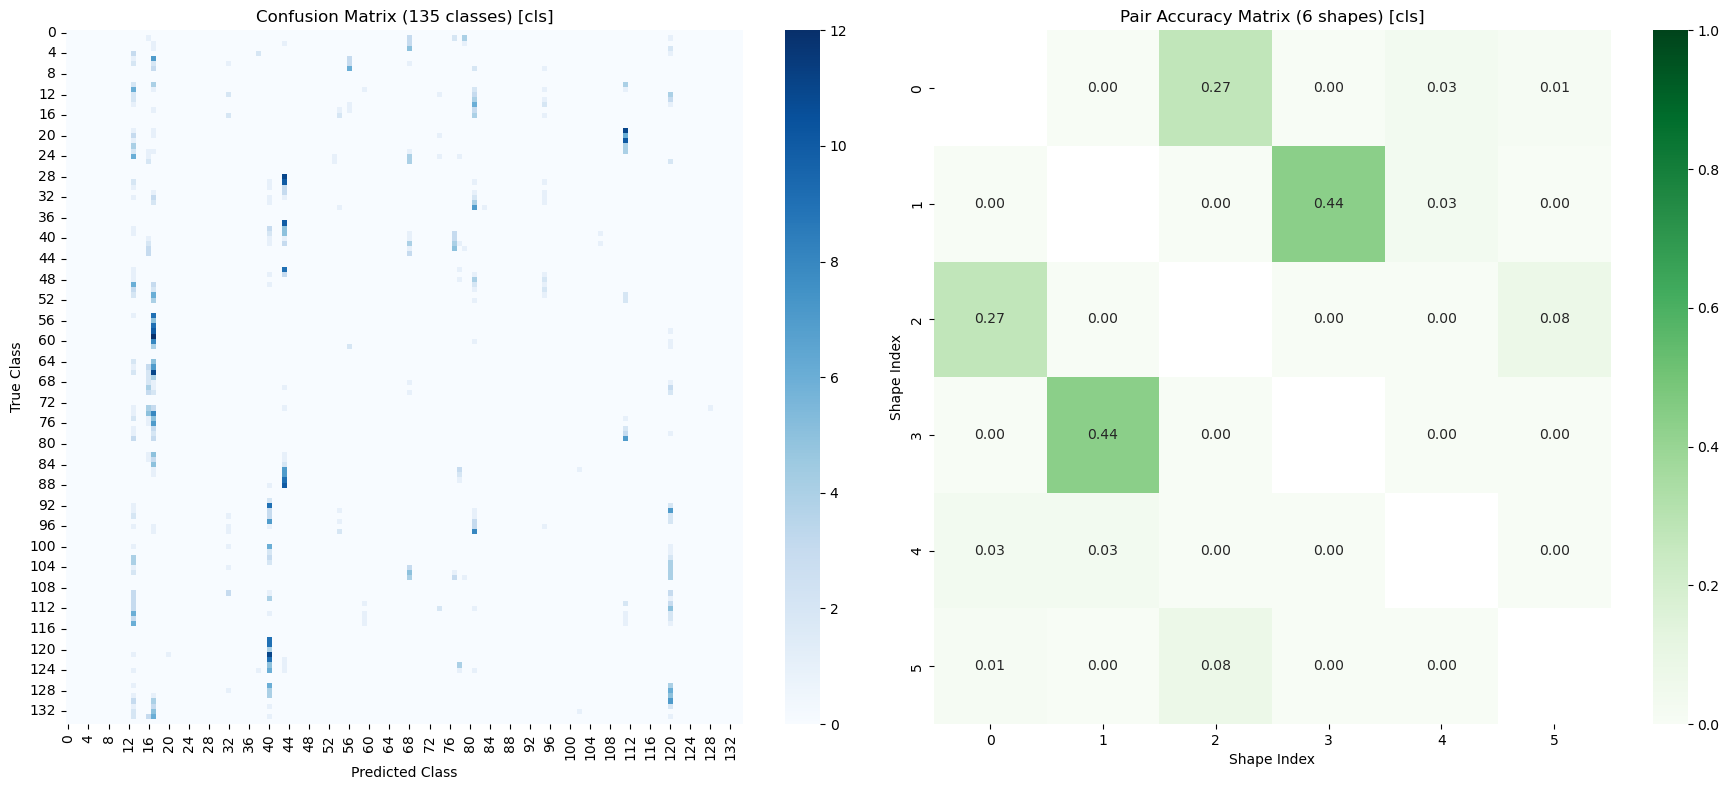

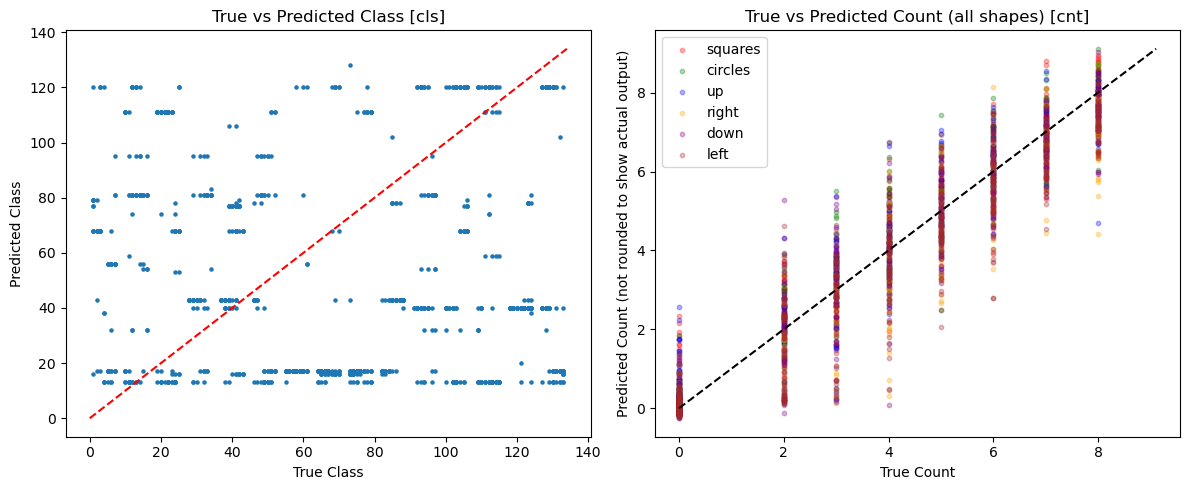

In [ ]:
test_metrics = test(
    model, device, test_loader, epoch=epochs, 
    lambda_cnt=lambda_cnt, verbose=True, data_for_plotting=True
)

plot_results(
    conf_mat=test_metrics["conf_mat"],
    pair_acc_mat=test_metrics["pair_acc_mat"],
    pred_labels_all=test_metrics["pred_labels_all"],
    true_labels_all=test_metrics["true_labels_all"],
    pred_counts_all=test_metrics["pred_counts_all"],
    true_counts_all=test_metrics["true_counts_all"],
    exp_num=2,
    save_dir="figures"
)

# Experiment 3
$\lambda_{cnt} = 0.4$

### Hyperparameters

In [ ]:
epochs = 100
lambda_cnt = 0.4     
lr = 1e-3            
log_interval = 20

# Early stopping hyperparameters (added)
early_stopping_patience = 15
early_stopping_min_delta = 0.01  # minimum improvement to reset patience

train_losses = []
train_top1 = []
train_pair_acc = []
val_losses = []
val_top1 = []
val_pair_acc = []
val_rmse_overall = []

### Training

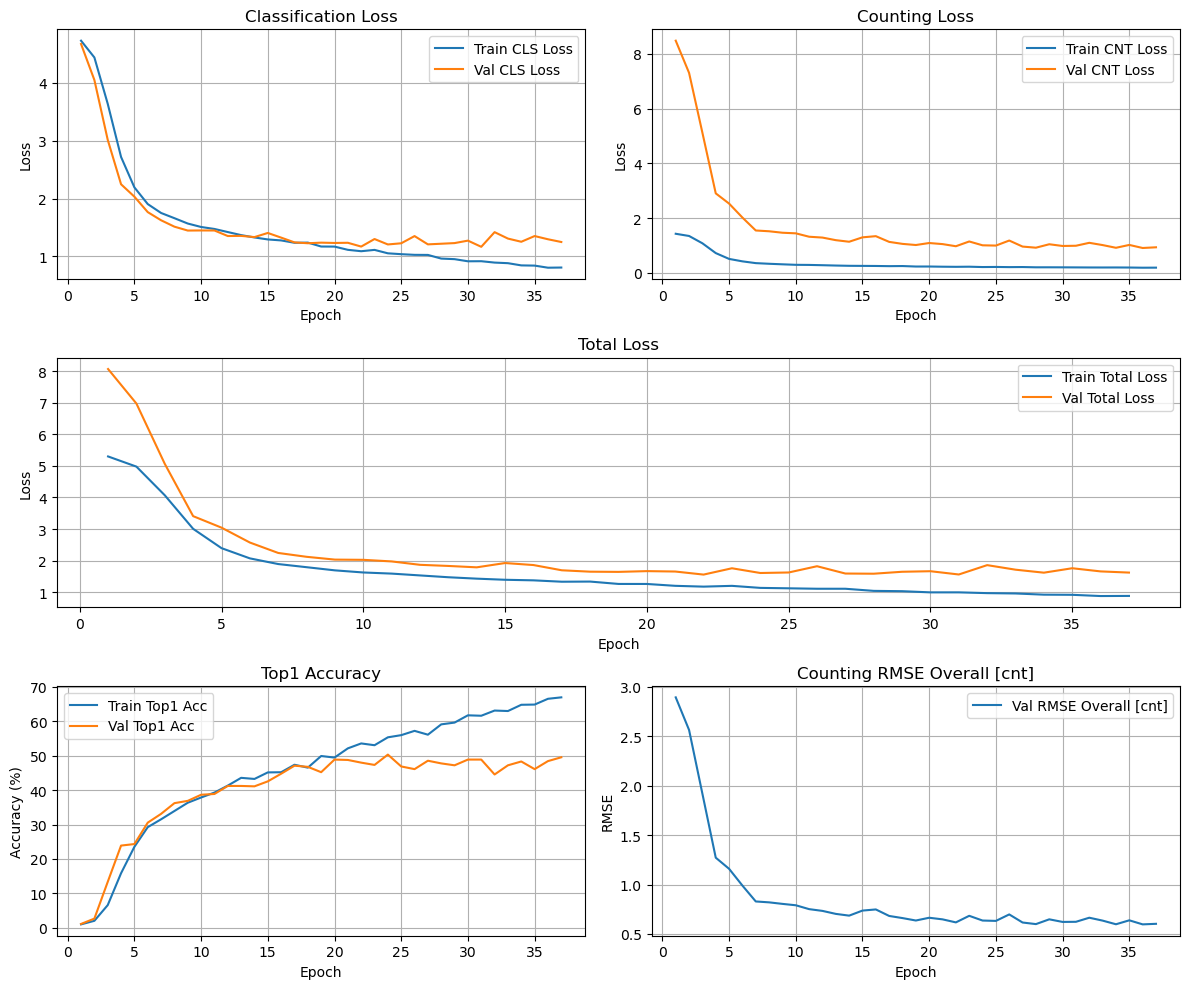

Early stopping triggered after epoch 37. No improvement in validation loss for 15 consecutive epochs.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MultiTaskNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
visualizer = TrainingVisualizer(save_path="figures/exp3_training_curves.png")

best_val_loss = float('inf')
epochs_no_improve = 0


for epoch in range(1, epochs + 1):
    tr_metrics = train_epoch(
        model, device, train_loader, optimizer, epoch, log_interval,
        verbose=False, lambda_cnt=lambda_cnt
    )
    # use validation loader (subset of training data) instead of test set
    val_metrics = test(
        model, device, val_loader, epoch, lambda_cnt=lambda_cnt, verbose=False
    )

    train_losses.append(tr_metrics["loss"])
    train_top1.append(tr_metrics["top1"])
    train_pair_acc.append(tr_metrics["pair_acc"])
    val_losses.append(val_metrics["loss_total"])
    val_top1.append(val_metrics["top1"])
    val_pair_acc.append(val_metrics["pair_acc"])
    val_rmse_overall.append(val_metrics["rmse_overall"])  # overall RMSE of counts
    
    visualizer.update(epoch, tr_metrics, val_metrics)

    current_val_loss = val_metrics["loss_total"]
    
    # Early stopping check
    if epoch == 1:
        best_val_loss = current_val_loss
        epochs_no_improve = 0
    else:
        if best_val_loss - current_val_loss > early_stopping_min_delta:
            best_val_loss = current_val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1

    if epochs_no_improve >= early_stopping_patience:
        print(f"Early stopping triggered after epoch {epoch}. No improvement in validation loss for {early_stopping_patience} consecutive epochs.")
        break

### Results


Test set (epoch 100):
  Classification (135-way):
    Top-1 accuracy: 48.50%
    Macro F1-score: 0.3579
    Per-pair accuracy (unordered pair): 94.40%

  Regression (6-D counts):
    RMSE per class:
      squares: 0.5075
      circles: 0.5496
      up     : 0.7994
      right  : 0.6565
      down   : 0.6244
      left   : 0.6938
    MAE per class:
      squares: 0.2796
      circles: 0.3041
      up     : 0.4925
      right  : 0.3767
      down   : 0.3507
      left   : 0.3900
    RMSE overall: 0.6456
    MAE overall: 0.3656

  Losses:
    cls=1.3614, cnt=1.0346, total=1.7752



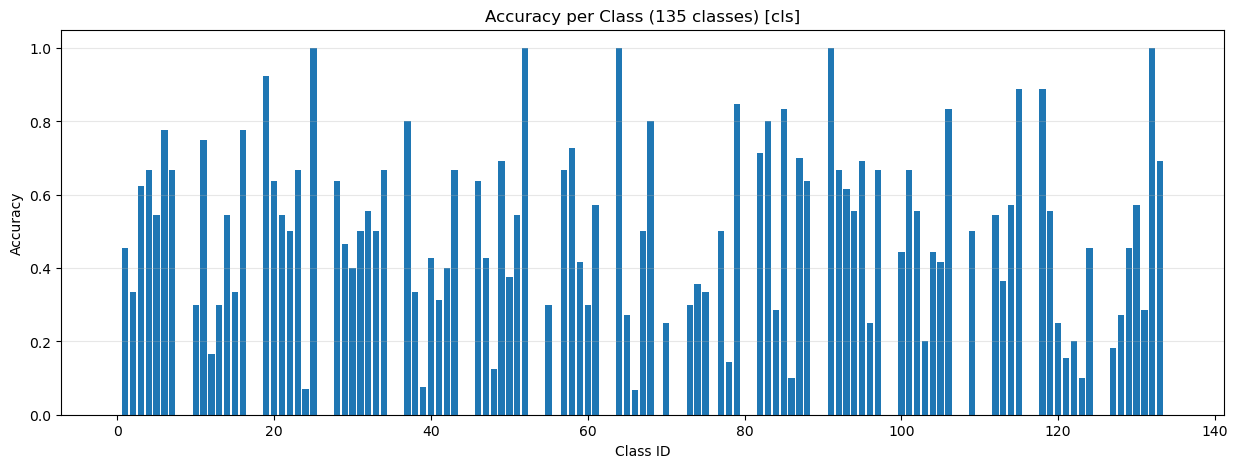

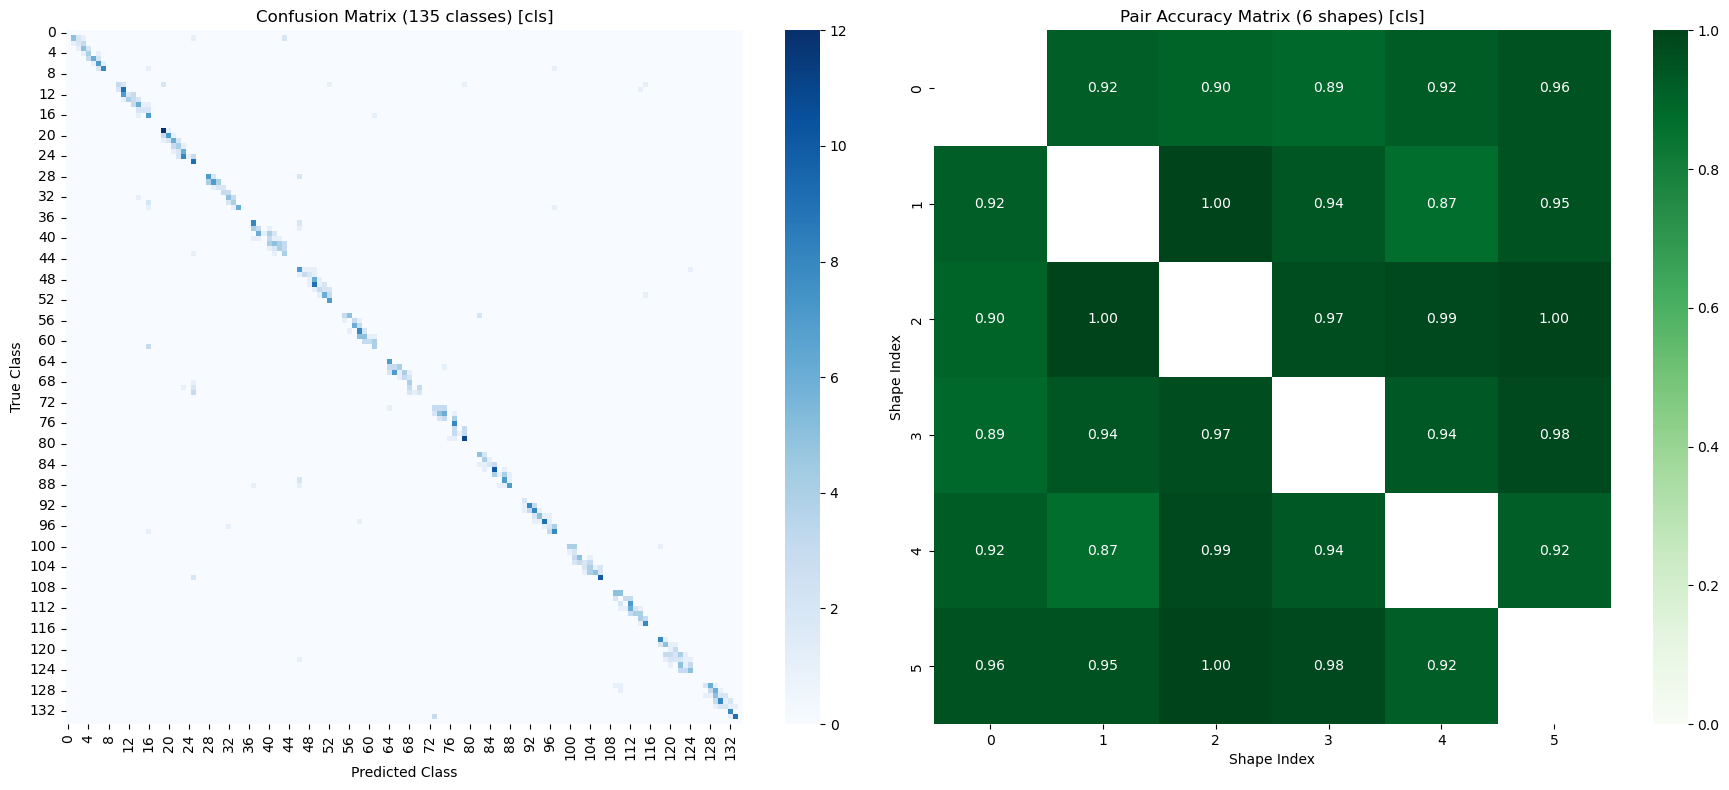

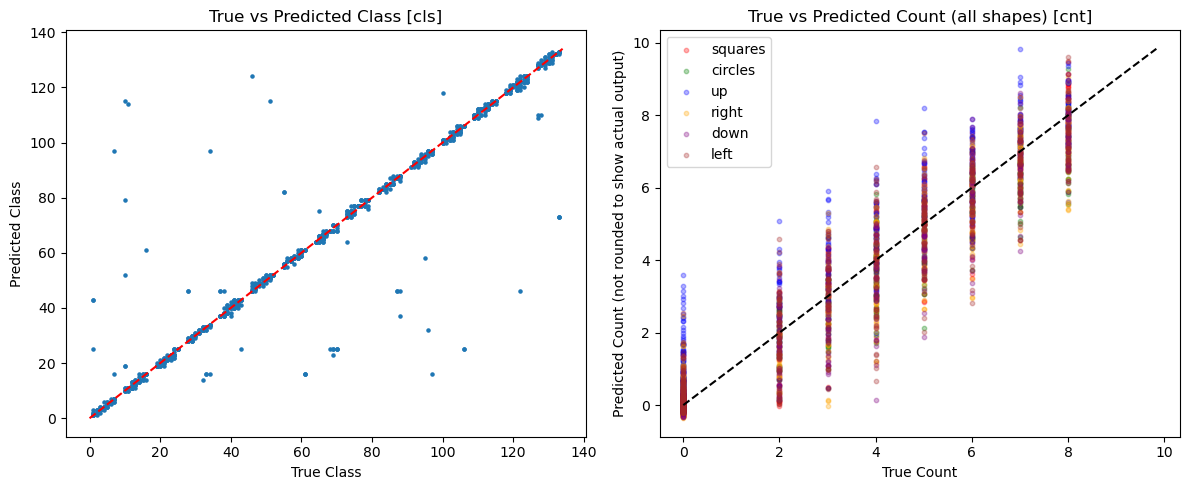

In [ ]:
test_metrics = test(
    model, device, test_loader, epoch=epochs, 
    lambda_cnt=lambda_cnt, verbose=True, data_for_plotting=True
)

plot_results(
    conf_mat=test_metrics["conf_mat"],
    pair_acc_mat=test_metrics["pair_acc_mat"],
    pred_labels_all=test_metrics["pred_labels_all"],
    true_labels_all=test_metrics["true_labels_all"],
    pred_counts_all=test_metrics["pred_counts_all"],
    true_counts_all=test_metrics["true_counts_all"],
    exp_num=3,
    save_dir="figures"
)